# Monte Carlo Method


Monte Carlo method is a computational algorithms that rely on random sampling to obtain numerical result. The main idea is to use randomness to solve problems that can also be solved using fixed, step-by-step methods. 

A Monte Carlo Simulation creates a model of possible outcomes by using a probability distribution, such as uniform or normal, for variables with inherent uncertainty.

- It repeatedly recalculates results, each time using a different set of random numbers within the specified range of minimum and maximum values.
- In a standard Monte Carlo experiment, this process is repeated thousands of times to generate a wide range of potential outcomes.

Monte Carlo methods are commonly used in three areas: (1) optimization, (2) numerical integration, and (3) generating random samples from a probability distribution.

In this assignment, we will **solve integration problems using the Monte Carlo method** and compare it with the **trapezoidal rule**, **Simpson’s rule**, and the analytical solution.

## Monte Carlo Integration 
Integrating a function is equivalent to calculating the area under the curve of that function. When a function is defined and we know its expression, we can estimate the integral over a given interval using different methods. 

One of the methods to do so is the **Monte Carlo Integration**, where random numbers are used to estimate the integral.

Monte Carlo integration is fairly simple, it works as follow:
1) **Random Sampling** :Generate a large number of random points $x_i$ uniformly distributed over the interval [a,b].
2) **Evaluate the Function**: For each random point $x_i$, compute the value of the function $f(x_i​)$.
3) **Calculate the average**: Find the average value of the function over all sample points. 
$$Average\;\; value = \frac{1}{N} \sum_{i=1}^{N} f(x_i)$$
where $N$ is the number of samples

4) **Estimate the integral**: Multiply the average value by the length of the interval to approximate the integral:
$$ \int_{a}^{b} f(x) \,dx  \approx (b-a) \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i)$$
This equation is called the **basic Monte Carlo estimator**.

This method is particularly useful for high-dimensional integrals or when the function $f(x)$ is complex. By increasing the number of random samples $N$, the approximation becomes more accurate due to the law of large numbers.



## Simpson's rule 


Simpson’s rule is one of the numerical methods which is used to evaluate the definite integral. It works by approximating the function with a piecewise quadratic polynomial (a parabola) and calculating the area under the polynomial. This method is more accurate than the trapezoidal rule for smooth functions because it uses a higher-order approximation. 

Formula: 
$$ \int_{a}^{b} f(x) \,dx \ \approx \frac{b-a}{6}\left[ f(a)+4f(\frac{a+b}{2}+f(b))  \right]$$

## Trapezoidal rule

The trapezoidal rule is also a technique for numerical integration. It works by approximating the region under the function $f(x)$ by diving it into $N$ subintervals of equal width (aka $N$ small trapezoids) and summing them to calculate its area. It follows that

$$\ \int_{a}^{b} f(x) \,dx \ \approx \sum_{k=1}^{N}\frac{f(x_{k-1})+f(x_k)}{2}\Delta x_k$$

where $N$ is the number of intervals 

$\Delta x_k$ is the length of k-th interval (that is , $\Delta x_k = x_k - x_{k-1}$)


Now, its look at some examples for applying the Monte Carlo integration, Simpson's rule and trapezoid rule using Python.

## Problem 1 

Evaluate the following integral using Monte Carlo, Simpson's rule, trapezoid rule and analytical values:

a.  $I=\int_{0}^{1}e^{-x}\cos(x)\,dx$

b.  $I=\int_{0}^{2\pi}e^{\sin(2x)}\,dx$

c.  $I=\int_{0}^{2\pi}\frac{1}{2+\cos(x)}\,dx$

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import simpson
from scipy.integrate import trapezoid

#### Problem 1a

a.  $I=\int_{0}^{1}e^{-x}\cos(x)\,dx$

First, let's define the function in Problem 1a and plot the function.  

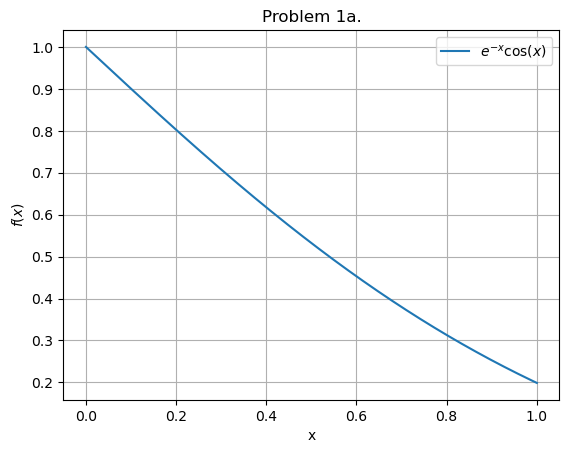

In [2]:
# Parameters
a = 0 # Lower limit 
b = 1 # Upper limit
N = 100000 # Number of intervals
x1 = np.linspace (a,b,N)

# Define function in a. 
def f1(x):
    return np.exp(-x)*np.cos(x)

# Plot the function
plt.plot(x1,f1(x1),label=r'$e^{-x}\cos(x)$')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.title('Problem 1a.')
plt.legend()
plt.grid()
plt.show()

The **analytical solution** for this integration is **0.5553968826533496**

Next, let's compute the Monte Carlo Integration.

0.556183 ± 0.000743


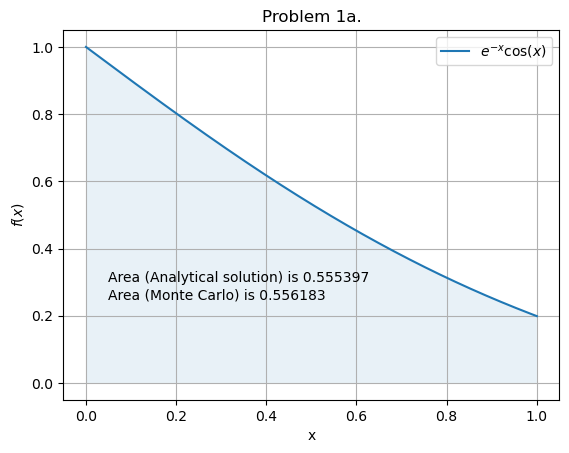

In [3]:
# Monte Carlo Integration
width = b-a 
samples = np.random.uniform(low=0, high = width, size = N) # Generate random numbers
mc_area = f1(samples).mean()*width
error_mc = np.std(f1(samples))*width/np.sqrt(N)
print(f'{mc_area:0.6f} ± {error_mc:0.6f}')
plt.plot(x1,f1(x1),label=r'$e^{-x}\cos(x)$')
plt.fill_between(x1,f1(x1),alpha=0.1)
plt.text(0.05,0.25,f'Area (Monte Carlo) is {mc_area:0.6f}',fontsize=10)
plt.text(0.05,0.3,f'Area (Analytical solution) is 0.555397' ,fontsize=10)
plt.title('Problem 1a.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()


Now let's compute the integration using simpson's rule and trapezoid rule.

Area(Simpson)=0.555397
Area(Trapezoid)=0.555397


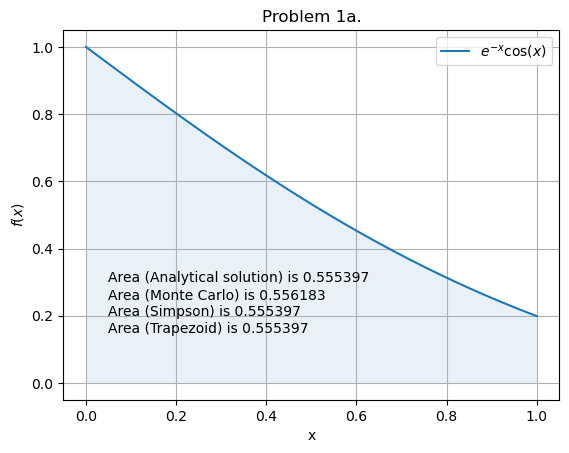

In [4]:
# Simpson's rule 
area1 = simpson(f1(x1),x=x1)
print(f'Area(Simpson)={area1:0.6f}')

# Trapezoid rule
area2 = trapezoid(f1(x1),x=x1)
print(f'Area(Trapezoid)={area2:0.6f}')

# Plot all the methods to compare 
plt.plot(x1,f1(x1),label=r'$e^{-x}\cos(x)$')
plt.fill_between(x1,f1(x1),alpha=0.1)
plt.text(0.05,0.25,f'Area (Monte Carlo) is {mc_area:0.6f}',fontsize=10)
plt.text(0.05,0.3,f'Area (Analytical solution) is 0.555397' ,fontsize=10)
plt.text(0.05,0.2,f'Area (Simpson) is {area1:0.6f}',fontsize=10)
plt.text(0.05,0.15,f'Area (Trapezoid) is {area2:0.6f}' ,fontsize=10)
plt.title('Problem 1a.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()


#### Comment on different methods
From the graph, we observe that Simpson's rule and the trapezoidal rule are highly accurate, achieving precision up to 6 decimal places when compared to the analytical solution. On the other hand, the Monte Carlo method achieves accuracy only up to 2 decimal places, even with 100,000 samples. While increasing the number of samples would improve the accuracy of the Monte Carlo method, its convergence is relatively slower compared to the deterministic methods due to its probabilistic nature.

However, it is important to note that the Monte Carlo method excels in situations involving multidimensional integrals. In higher dimensions, Simpson's rule and the trapezoidal rule become less practical due to the exponential increase in computational cost.

#### Problem 1b. 

b.  $I=\int_{0}^{2\pi}e^{\sin(2x)}\,dx$

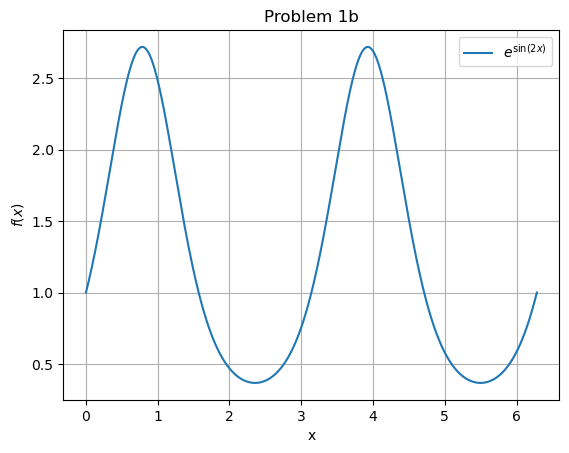

In [5]:
# Parameters
c = 0 # Lower limit 
d = 2*np.pi # Upper limit
N = 100000 # Number of intervals
x2 = np.linspace (c,d,N)

# Define function in a. 
def f2(x):
    return np.exp(np.sin(2*x))

# Plot the function
plt.plot(x2,f2(x2),label = r'$e^{\sin(2x)}$')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.title('Problem 1b')
plt.legend()
plt.grid()
plt.show()

The **analytical solution** for this integration is **7.95492**

Next, let's compute the Monte Carlo Integration.

7.968775 ± 0.001787


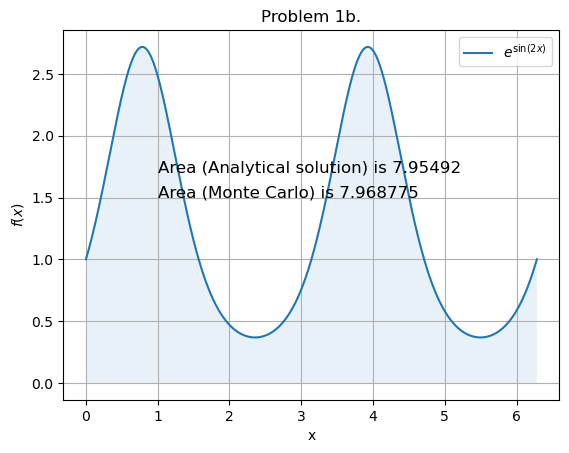

In [6]:
# Monte Carlo Integration
width2 = d-c 
samples2 = np.random.uniform(low=0, high = width2, size = N) # Generate random numbers
mc_area2 = f2(samples2).mean()*width2
error_mc2 = np.std(f2(samples))*width/np.sqrt(N)
print(f'{mc_area2:0.6f} ± {error_mc2:0.6f}')
plt.plot(x2,f2(x2),label=r'$e^{\sin(2x)}$')
plt.fill_between(x2,f2(x2),alpha=0.1)
plt.text(1,1.5,f'Area (Monte Carlo) is {mc_area2:0.6f}',fontsize=12)
plt.text(1,1.7,f'Area (Analytical solution) is 7.95492' ,fontsize=12)
plt.title('Problem 1b.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()

Now let's compute the integration using simpson's rule and trapezoid rule.


Area(Simpson)=7.954927
Area(Trapezoid)=7.954927


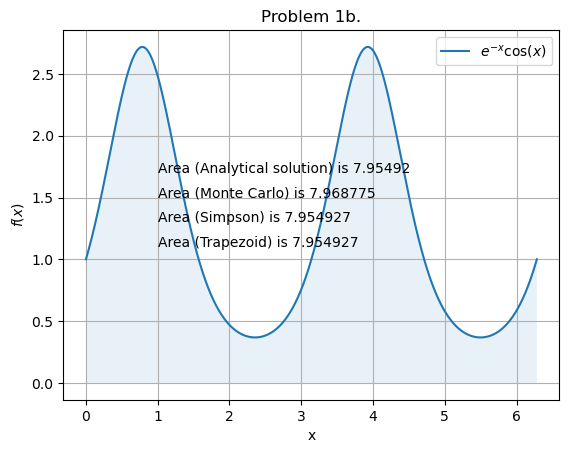

In [7]:
# Simpson's rule 
area2 = simpson(f2(x2),x=x2)
print(f'Area(Simpson)={area2:0.6f}')

# Trapezoid rule
area3 = trapezoid(f2(x2),x=x2)
print(f'Area(Trapezoid)={area3:0.6f}')

# Plot all the methods to compare 
plt.plot(x2,f2(x2),label=r'$e^{-x}\cos(x)$')
plt.fill_between(x2,f2(x2),alpha=0.1)
plt.text(1,1.5,f'Area (Monte Carlo) is {mc_area2:0.6f}',fontsize=10)
plt.text(1,1.7,f'Area (Analytical solution) is 7.95492' ,fontsize=10)
plt.text(1,1.3,f'Area (Simpson) is {area2:0.6f}',fontsize=10)
plt.text(1,1.1,f'Area (Trapezoid) is {area3:0.6f}' ,fontsize=10)
plt.title('Problem 1b.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()

### Problem 1c.
c.  $I=\int_{0}^{2\pi}\frac{1}{2+\cos(x)}\,dx$

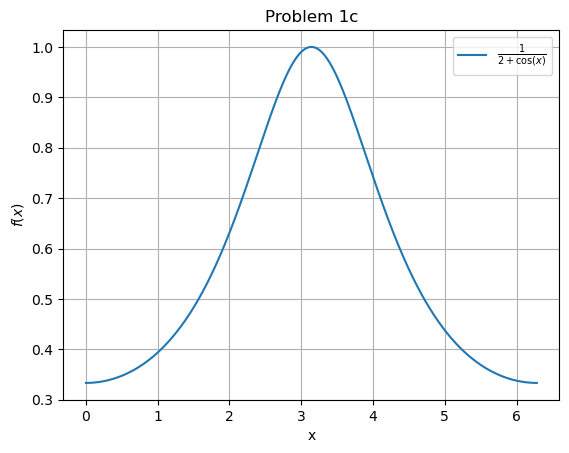

In [8]:
# Parameters
e = 0 # Lower limit 
f = 2*np.pi # Upper limit
N = 100000 # Number of intervals
x3 = np.linspace (e,f,N)

# Define function in a. 
def f3(x):
    return 1/(2+np.cos(x))

# Plot the function
plt.plot(x3,f3(x3),label = r'$\frac{1}{2+\cos(x)}$')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.title('Problem 1c')
plt.legend()
plt.grid()
plt.show()

The **analytical solution** for this integration is **3.62759**

Next, let's compute the Monte Carlo Integration.

3.625680 ± 0.000719


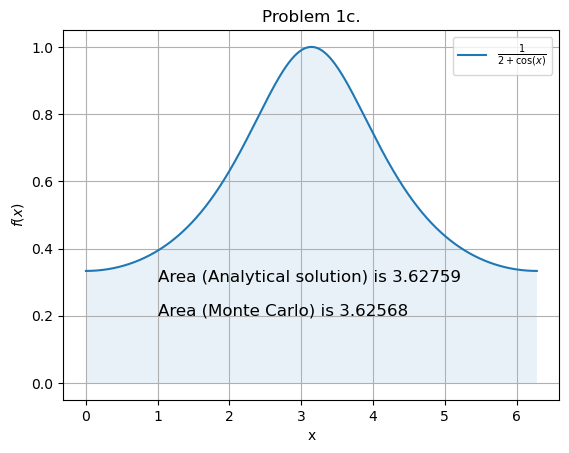

In [9]:
# Monte Carlo Integration
width3 = f-e 
samples3 = np.random.uniform(low=0, high = width3, size = N) # Generate random numbers
mc_area3 = f3(samples3).mean()*width3
error_mc3 = np.std(f3(samples3))*width/np.sqrt(N)
print(f'{mc_area3:0.6f} ± {error_mc3:0.6f}')

plt.plot(x3,f3(x3),label=r'$\frac{1}{2+\cos(x)}$')
plt.fill_between(x3,f3(x3),alpha=0.1)
plt.text(1,0.2,f'Area (Monte Carlo) is {mc_area3:0.5f}',fontsize=12)
plt.text(1,0.3,f'Area (Analytical solution) is 3.62759' ,fontsize=12)
plt.title('Problem 1c.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()

Now let's compute the integration using simpson's rule and trapezoid rule.


Area(Simpson)=3.627599
Area(Trapezoid)=3.627599


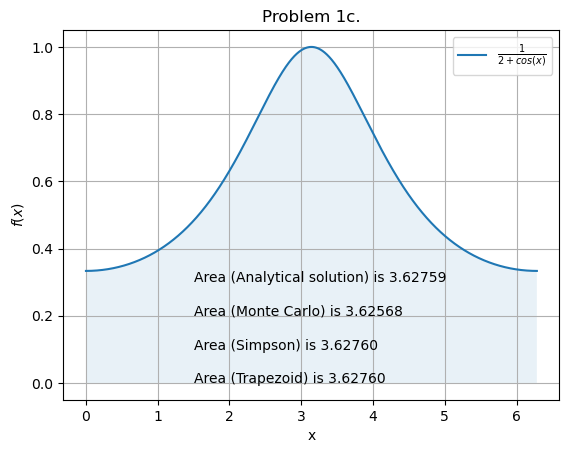

In [10]:
# Simpson's rule 
area4 = simpson(f3(x3),x=x3)
print(f'Area(Simpson)={area4:0.6f}')

# Trapezoid rule
area5 = trapezoid(f3(x3),x=x3)
print(f'Area(Trapezoid)={area5:0.6f}')

# Plot all the methods to compare 
plt.plot(x3,f3(x3),label=r'$\frac{1}{2+cos(x)}$')
plt.fill_between(x3,f3(x3),alpha=0.1)
plt.text(1.5,0.2,f'Area (Monte Carlo) is {mc_area3:0.5f}',fontsize=10)
plt.text(1.5,0.3,f'Area (Analytical solution) is 3.62759' ,fontsize=10)
plt.text(1.5,0.1,f'Area (Simpson) is {area4:0.5f}',fontsize=10)
plt.text(1.5,0.0,f'Area (Trapezoid) is {area5:0.5f}' ,fontsize=10)
plt.title('Problem 1c.')
plt.xlabel ('x')
plt.ylabel ('$f(x)$')
plt.legend()
plt.grid()
plt.show()

## Problem 2


2. Apply normal distribution to the following integral 
$$I= \int_{10^{-6}}^{1} \frac{e^{-x}}{x} dx$$

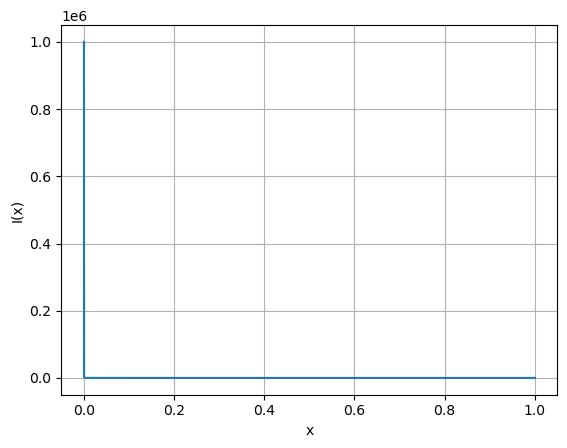

In [11]:
# Parameters 
l = 1e-6   # Lower limit
u = 1   # Upper limit 
N = 1000000  
x4 = np.linspace (l,u,N)

def I(x):
    return (np.exp(-x))/x

# Plot the function 
plt.plot(x4,I(x4))
plt.xlabel('x')
plt.ylabel('I(x)')
plt.grid()
plt.show()

This integral poses a computational challenge due to the singularity at $10^{-6}$ and the rapid decay of $e^{-x}$. We have to apply normal distribution for Monte Carlo Integration to employ importance sampling to compute the integral more efficiently.
 

#### 1. Define the function and compute its analytical solution

In [12]:
import numpy as np
from scipy.stats import truncnorm
from scipy.integrate import quad

# Parameters for the truncated normal distribution
a, b = 10**-6, 1  # Bounds
mu, sigma = 1, 0.5  # Mean and standard deviation of normal distribution

# Define the function 
def I(x):
    return np.exp(-x)/x

# Analytical solution using quad solver
solution, error = quad(I, 1e-6, 1)
print(f'The analytical solution is {solution}')


The analytical solution is 13.018911958666969


#### Importance Sampling with Truncated Gaussian:

Why: Direct Monte Carlo sampling uniformly across [$10^{−6}$, 1] would inefficiently sample regions where $e^{-x}/x$ contributes little to the integral.
Instead, we sample more frequently where the integrand is significant by using a truncated Gaussian as the importance sampling distribution.

#### 2. Set Up Truncated Normal Distribution:
1. Define the truncated Gaussian with bounds [$10^{-6}$,1], mean $\mu = 1$ and standard deviation σ=0.5.
2. Calculate the standard normal bounds for truncation:
$$lower \;= \frac{a-\mu}{\sigma}\;\;\;\;\;\;\;\;\;\;upper \;= \frac{b-\mu}{\sigma}$$

In [13]:
# Truncated normal distribution
lower, upper = (a - mu) / sigma, (b - mu) / sigma
trunc_norm = truncnorm(lower, upper, loc=mu, scale=sigma)

#### 3. Sampling

1. Generate $N$ random samples from the truncated Gaussian using `trunnorm.rvs`.
2. Compute weights for each sample using:
$$w(x)=\frac{f(x)}{g(x)}$$
where $g(x)$ is the truncated Gaussian probability density function

In [16]:
# Sampling
N = 1000000 # Number of samples
samples = trunc_norm.rvs(N)   # Generate random numbers between the lower and upper limit of truncated normal distribution
weights = (np.exp(samples)/samples) / trunc_norm.pdf(samples)  
error = np.std(np.exp(samples)/samples)*(b-a)/np.sqrt(N)


#### 4. Monte Carlo Integration 
1. Estimate the integral as:
$$I \approx \frac{1}{N}\sum_{i=1}^{N}w(x_i)$$
where $w(x_i)$ accounts for the importance sampling.

In [17]:
# Monte Carlo Integration
I = np.mean(weights)  # Approximate integral
print(f'Monte Carlo estimate of the integral: {I:0.6f} ± {error:0.6f} ')

Monte Carlo estimate of the integral: 13.535397 ± 0.252340 
